#### 1. Spline Fitting

┌ Info: Recompiling stale cache file /Users/zhengxianjie/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = __init__() at init.jl:175
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/init.jl:175
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObject) at init.jl:73
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/init.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObje

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:117
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/PyPlot.jl:117
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:118
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/PyPlot.jl:118
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:118
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/PyPlot.jl:118
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot ove

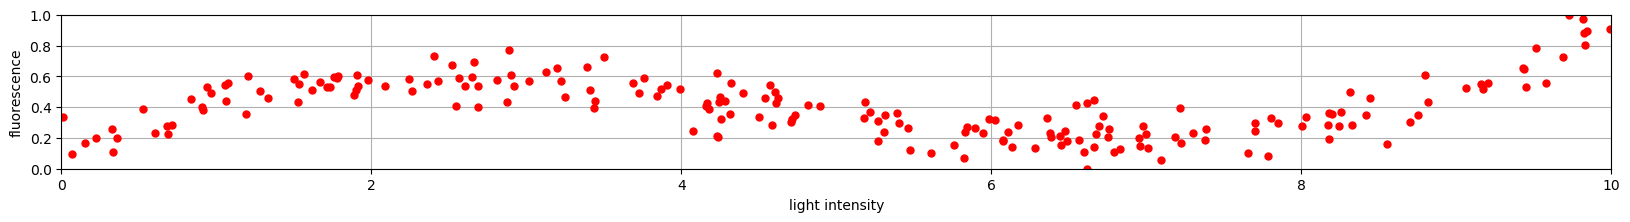

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:73
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/PyPlot.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:77
└ @ PyPlot /Users/zhengxianjie/.julia/packages/PyPlot/fZuOQ/src/PyPlot.jl:77
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("i

In [1]:
#a
using NamedArrays, CSV, PyPlot
raw = CSV.read("xy_data.csv", datarow = 1);
(m,n) = size(raw)
x = raw[1:m,1]
y = raw[1:m,2]

figure(figsize=(20,2))
plot(x,y,"r.", markersize=10)
axis([0,10,0,1])
xlabel("light intensity");  ylabel("fluorescence")
grid("True")


In [11]:
# order of polynomial to use
k = 3

n = length(x)
A = zeros(n,k)
for i = 1:n
    for j = 1:k
        A[i,j] = x[i]^(k+1-j)
    end
end

In [8]:

# Solve the LEAST SQUARES polynomial fit

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k])
@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
coe = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(coe)

Academic license - for non-commercial use only
Optimal
1.8806615968352887
[0.00932501, -0.134546, 0.511155]


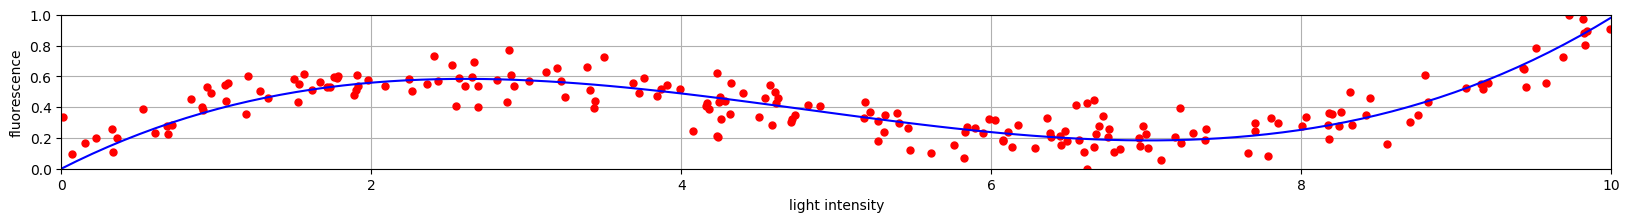

In [12]:
xfine = range(0,stop = 10,length  = 100)
yfine = coe[1]*xfine.^3 + coe[2]*xfine.^2 + coe[3]*xfine
figure(figsize=(20,2))
plot(x,y,"r.", markersize=10)
plot( xfine, yfine, "b-")
axis([0,10,0,1])
xlabel("light intensity");  ylabel("fluorescence")
grid()

In [48]:
#b
using JuMP, Gurobi, Mosek
yA = y[1:76]
yB = y[77:200]
k = 2
xA = zeros(76,k)
for i = 1:76
    for j = 1:k
        xA[i,j] = x[i]^(k+1-j)
    end
end
xB = zeros(124,k+1)
for i = 1:124
    for j = 1:k+1
        xB[i,j] = x[i+76]^(k+1-j)
    end
end
m = Model(solver=GurobiSolver(OutputFlag=0))
fu = [16,4]
fv = [16,4,1]
@variable(m, u[1:k])
@variable(m, v[1:k+1])
@constraint(m, fu'*u == fv'*v)
@constraint(m, 8u[1] + u[2] == 8v[1] + v[2])
@objective(m, Min, sum( (yA - xA*u).^2 ) + sum((yB - xB*v).^2 ))
status = solve(m)
coeu = getvalue(u)
coev = getvalue(v)
println(status)
println(getobjectivevalue(m))
println(coeu, coev)

Academic license - for non-commercial use only
Optimal
2.058415109430264
[-0.0873261, 0.467682][0.0484683, -0.618673, 2.17271]


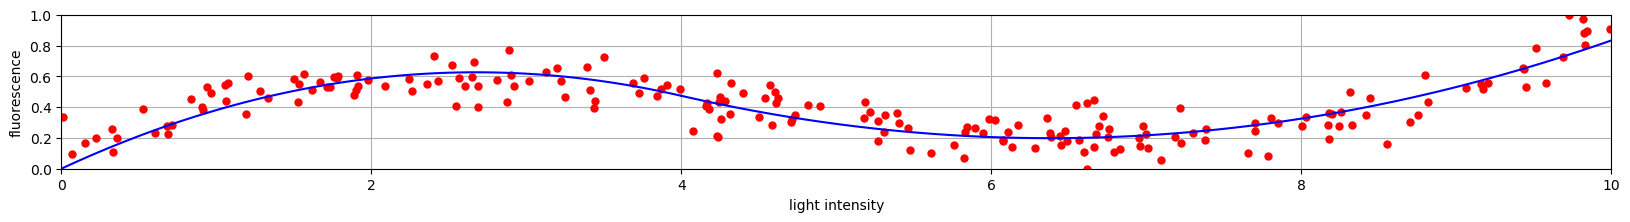

In [49]:
xfine = range(0,stop = 4,length  = 100)
yfine = coeu[1]*xfine.^2 + coeu[2]*xfine
xxfine = range(4,stop = 10,length  = 100)
yyfine = coev[1]*xxfine.^2 + coev[2]*xxfine .+coev[3]
figure(figsize=(20,2))
plot(x,y,"r.", markersize=10)
plot( xfine, yfine, "b-")
plot( xxfine, yyfine, "b-")
axis([0,10,0,1])
xlabel("light intensity");  ylabel("fluorescence")
grid()

#### 2. Moving averages

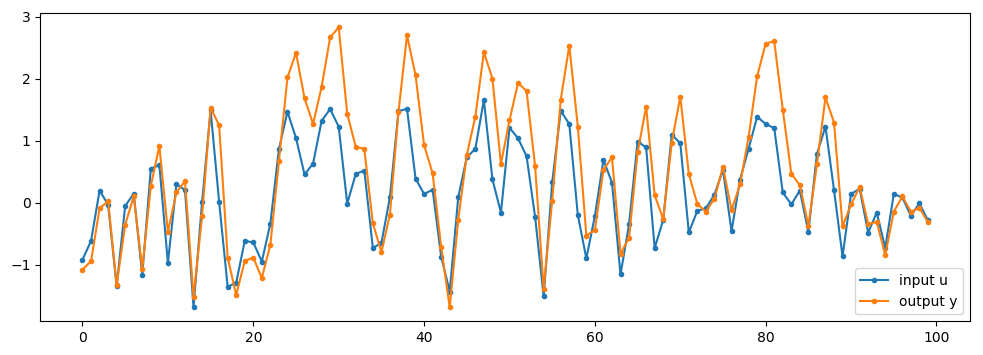

In [50]:
#a
# Load the data file (ref: Boyd/263)
using CSV
raw = CSV.read("uy_data.csv",datarow = 1);
u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

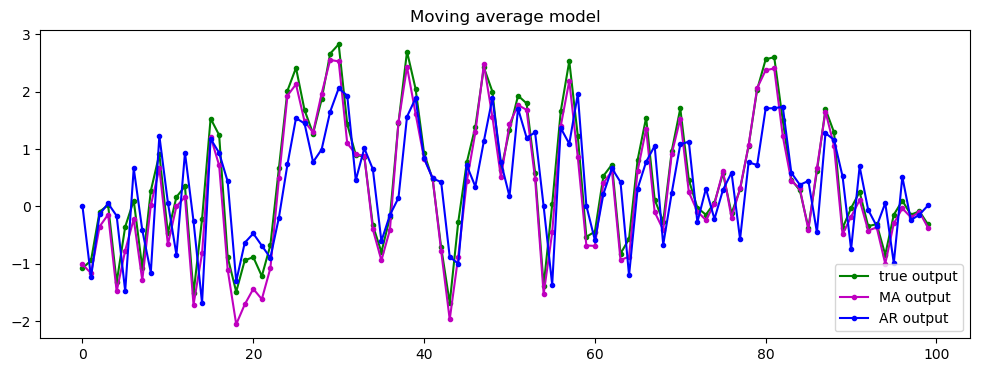


The difference between MA estimates and the true values is: 2.460854388269911
The difference between AR estimates and the true values is: 7.436691765656794


In [51]:
using LinearAlgebra

width = 5
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
woptMA = A\y
yMA = A*woptMA
B = zeros(T,width)
for i = 1:T
    for j = 1:width
        if i-j> 0 
            B[i,j] = y[i-j]
        else
            B[i,j] = 0
        end
    end
end
woptAR = B\y
yAR = B*woptAR
figure(figsize=(12,4))
plot(y,"g.-",yMA,"m.-",yAR,"b.-")
legend(["true output", "MA output","AR output"], loc="lower right");
title("Moving average model");
println()
println("The difference between MA estimates and the true values is: "
    ,LinearAlgebra.norm(yMA-y))
println("The difference between AR estimates and the true values is: "
    ,LinearAlgebra.norm(yAR-y))

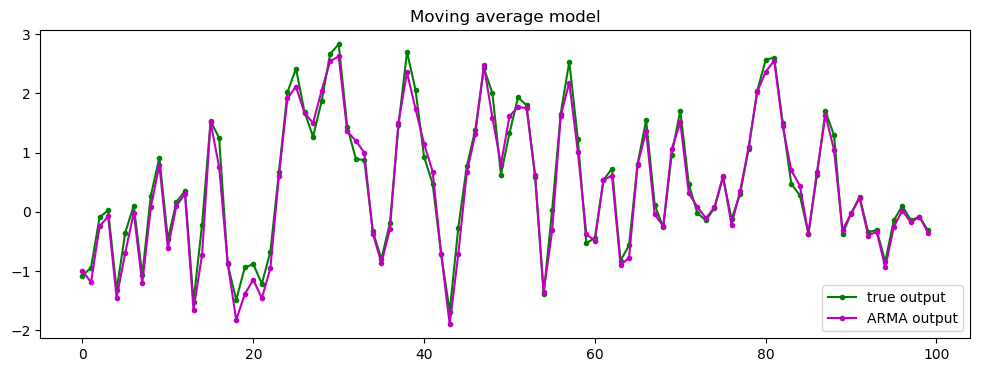


The difference between ARMA estimates and the true values is: 1.8565828148734604


In [52]:
#b
using LinearAlgebra
width = 1
C = zeros(T,width + width)
for i = 1:T
    for j = 1:width
        if i-j> 0 
            C[i,j] = y[i-j]
        else
            C[i,j] = 0
        end
    end
end
for i = 1 : width
    C[i:end,i+width] = u[1:end-i+1]
end
woptARMA = C\y
yARMA = C*woptARMA

figure(figsize=(12,4))
plot(y,"g.-",yARMA,"m.-")
legend(["true output", "ARMA output"], loc="lower right");
title("Moving average model");
println()
println("The difference between ARMA estimates and the true values is: "
    ,LinearAlgebra.norm(yARMA-y))

c) Compare the difference between three models, we can see that ARMA model has the closest result, because it takes both the recent input and output as training models to predict value, and update weight to be more accurate. This training model will do better than model that only takes input or output.

#### 3. Hovercraft rendezvous

In [53]:
#a
using JuMP, Gurobi, Mosek
# unit are s, m/s, and metres
# <east,north>
    T = 60
    v_A = 20
    v_B = 30
    dis = 0.5

    m = Model(solver = GurobiSolver(OutputFlag=0))
    
    @variable(m, a[1:2,1:T])  # Alice's position
    @variable(m, b[1:2,1:T])  # Bob's position
    @variable(m, va[1:2,1:T])  # resulting Alice's velocity
    @variable(m, vb[1:2,1:T])  # resulting Bob's velocity
    @variable(m, ua[1:2,1:T])  # thruster Alice's input
    @variable(m, ub[1:2,1:T])  # thruster Bob's input
    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, va[:,1] .== [0;v_A])
    @constraint(m, vb[:,1] .== [v_B;0])
    @constraint(m, a[:,1] .== [0;0])
    @constraint(m, b[:,1] .== [dis;0])
    for t in 1:T-1
        @constraint(m, a[:,t+1] .== a[:,t] + 1/3600*va[:,t])
        @constraint(m, va[:,t+1] .== va[:,t] + ua[:,t])
        @constraint(m, b[:,t+1] .== b[:,t] + 1/3600*vb[:,t])
        @constraint(m, vb[:,t+1] .== vb[:,t] + ub[:,t])
    end
    
    @constraint(m, a[:,T] .== b[:,T])

    
    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(ua.^2) + sum( ub.^2 ))
    solve(m)

Academic license - for non-commercial use only


:Optimal

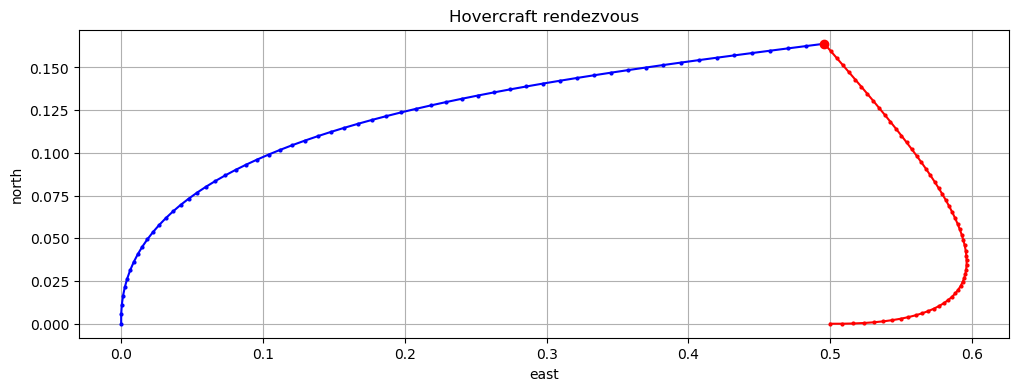

In [54]:
using PyPlot
figure(figsize=(12,4))
xa = getvalue(a)
xb = getvalue(b)
plot(xa[1,:], xa[2,:],"b.-", markersize=4  )
plot(xb[1,:], xb[2,:],"r.-", markersize=4  )
plot(xa[1,T], xa[2,T], "r.", markersize=12 )
title("Hovercraft rendezvous")
xlabel("east")
ylabel("north")
grid()

In [55]:
#b
using JuMP, Gurobi, Mosek
# unit are s, m/s, and metres
# <east,north>
    T = 60
    v_A = 20
    v_B = 30
    dis = 0.5

    m = Model(solver = GurobiSolver(OutputFlag=0))
    
    @variable(m, a[1:2,1:T])  # Alice's position
    @variable(m, b[1:2,1:T])  # Bob's position
    @variable(m, va[1:2,1:T])  # resulting Alice's velocity
    @variable(m, vb[1:2,1:T])  # resulting Bob's velocity
    @variable(m, ua[1:2,1:T])  # thruster Alice's input
    @variable(m, ub[1:2,1:T])  # thruster Bob's input
    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, va[:,1] .== [0;v_A])
    @constraint(m, vb[:,1] .== [v_B;0])
    @constraint(m, a[:,1] .== [0;0])
    @constraint(m, b[:,1] .== [dis;0])
    for t in 1:T-1
        @constraint(m, a[:,t+1] .== a[:,t] + 1/3600*va[:,t])
        @constraint(m, va[:,t+1] .== va[:,t] + ua[:,t])
        @constraint(m, b[:,t+1] .== b[:,t] + 1/3600*vb[:,t])
        @constraint(m, vb[:,t+1] .== vb[:,t] + ub[:,t])
    end
    
    @constraint(m, a[:,T] .== b[:,T])
    @constraint(m, va[:,T] .== vb[:,T])
    
    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(ua.^2) + sum( ub.^2 ))
    solve(m)

Academic license - for non-commercial use only


:Optimal

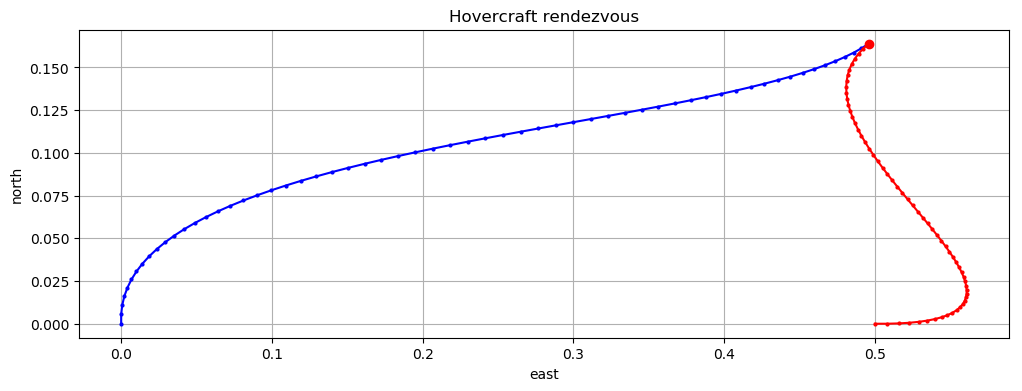

In [56]:
using PyPlot
figure(figsize=(12,4))
xa = getvalue(a)
xb = getvalue(b)
plot(xa[1,:], xa[2,:],"b.-", markersize=4  )
plot(xb[1,:], xb[2,:],"r.-", markersize=4  )
plot(xa[1,T], xa[2,T], "r.", markersize=12 )
title("Hovercraft rendezvous")
xlabel("east")
ylabel("north")
grid()